In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cv2
import seaborn as sns

In [33]:
patches = pd.read_csv('../results/tree_density/predictions.csv', index_col=0)
trees = pd.read_csv('../data/reforestree/field_data.csv')

In [34]:
patches = patches.rename(columns={"patch size": "patch_size"})
patches = patches.drop(columns=patches.columns[0], axis=1)

In [35]:
patches

,carbon,path,site,rotation,patch_size,site_index,predictions,true_value
0,2.204978,patches/Nestor Macias RGB_0_284.png,Nestor Macias RGB,0,400,"(7, 18)",2.203341,3.200648
1,2.434174,patches/Nestor Macias RGB_0_321.png,Nestor Macias RGB,0,400,"(8, 17)",2.886034,3.868481
2,2.969245,patches/Nestor Macias RGB_0_322.png,Nestor Macias RGB,0,400,"(8, 18)",2.590658,3.110763
3,2.621127,patches/Nestor Macias RGB_0_323.png,Nestor Macias RGB,0,400,"(8, 19)",2.774688,2.884879
4,3.847297,patches/Nestor Macias RGB_0_360.png,Nestor Macias RGB,0,400,"(9, 18)",2.669521,3.555361
...,...,...,...,...,...,...,...,...
4150,1.538736,patches/Manuel Macias RGB_60_748.png,Manuel Macias RGB,60,400,"(21, 13)",2.821491,1.261236
4151,1.512356,patches/Manuel Macias RGB_60_749.png,Manuel Macias RGB,60,400,"(21, 14)",3.098462,0.855967
4152,2.392369,patches/Manuel Macias RGB_60_750.png,Manuel Macias RGB,60,400,"(21, 15)",3.580834,2.456567
4153,2.559710,patches/Manuel Macias RGB_60_751.png,Manuel Macias RGB,60,400,"(21, 16)",3.239966,2.487214


In [36]:
a = [np.flip(eval(site_index))*patch_size for site_index, patch_size in zip(patches.site_index, patches.patch_size)]
b = [np.array([a[0], a[1] + patch_size]) for a, patch_size in zip(a, patches.patch_size)]
c = [np.array([a[0] + patch_size, a[1] + patch_size]) for a, patch_size in zip(a, patches.patch_size)]
d = [np.array([a[0] + patch_size, a[1]]) for a, patch_size in zip(a, patches.patch_size)]
vertices = np.moveaxis(np.stack((a,b,c,d)), 0, 1).tolist()
patches["vertices"] = vertices

In [37]:
image_shapes = {"Flora Pluas RGB": (15578, 16782),
                "Nestor Macias RGB": (13024, 15003),
                "Manuel Macias RGB": (10879, 13748),
                "Leonor Aspiazu RGB": (13855, 17134),
                "Carlos Vera Arteaga RGB": (15053, 15297),
                "Carlos Vera Guevara RGB": (12305, 12425)}

In [38]:
vertices_transformed_array = []
for idx, patch in patches.iterrows():
    angle = np.deg2rad(patch.rotation)
    A = np.array([[np.cos(angle), - np.sin(angle)], [np.sin(angle), np.cos(angle)]])
    h = image_shapes[patch.site][0]
    w = image_shapes[patch.site][1]
    offset1 = np.array([w, h])
    w2 = int(np.dot(offset1, np.array([np.cos(angle), np.sin(angle)])))
    h2 = int(np.dot(offset1, np.array([np.sin(angle), np.cos(angle)])))
    offset2 = np.array([w2, h2])
    vertices_transformed = [np.dot(A, coordinate - 0.5 * offset1) + 0.5 * offset1 for coordinate in patch.vertices]
    vertices_transformed_array.append(np.rint(vertices_transformed).astype(int))

patches["vertices_transformed"] = vertices_transformed_array

In [39]:
site = "Nestor Macias RGB" # "Leonor Aspiazu RGB"
patches_site = patches[patches.site == site]
trees_site = trees[trees.site == site]

In [40]:
patches_site

,carbon,path,site,rotation,patch_size,site_index,predictions,true_value,vertices,vertices_transformed
0,2.204978,patches/Nestor Macias RGB_0_284.png,Nestor Macias RGB,0,400,"(7, 18)",2.203341,3.200648,"[[7200, 2800], [7200, 3200], [7600, 3200], [76...","[[7200, 2800], [7200, 3200], [7600, 3200], [76..."
1,2.434174,patches/Nestor Macias RGB_0_321.png,Nestor Macias RGB,0,400,"(8, 17)",2.886034,3.868481,"[[6800, 3200], [6800, 3600], [7200, 3600], [72...","[[6800, 3200], [6800, 3600], [7200, 3600], [72..."
2,2.969245,patches/Nestor Macias RGB_0_322.png,Nestor Macias RGB,0,400,"(8, 18)",2.590658,3.110763,"[[7200, 3200], [7200, 3600], [7600, 3600], [76...","[[7200, 3200], [7200, 3600], [7600, 3600], [76..."
3,2.621127,patches/Nestor Macias RGB_0_323.png,Nestor Macias RGB,0,400,"(8, 19)",2.774688,2.884879,"[[7600, 3200], [7600, 3600], [8000, 3600], [80...","[[7600, 3200], [7600, 3600], [8000, 3600], [80..."
4,3.847297,patches/Nestor Macias RGB_0_360.png,Nestor Macias RGB,0,400,"(9, 18)",2.669521,3.555361,"[[7200, 3600], [7200, 4000], [7600, 4000], [76...","[[7200, 3600], [7200, 4000], [7600, 4000], [76..."
...,...,...,...,...,...,...,...,...,...,...
642,2.432950,patches/Nestor Macias RGB_60_971.png,Nestor Macias RGB,60,400,"(25, 21)",2.999648,3.067641,"[[8400, 10000], [8400, 10400], [8800, 10400], ...","[[4930, 9034], [4584, 9234], [4784, 9581], [51..."
643,2.090596,patches/Nestor Macias RGB_60_972.png,Nestor Macias RGB,60,400,"(25, 22)",2.314445,3.837712,"[[8800, 10000], [8800, 10400], [9200, 10400], ...","[[5130, 9381], [4784, 9581], [4984, 9927], [53..."
644,1.718304,patches/Nestor Macias RGB_60_973.png,Nestor Macias RGB,60,400,"(25, 23)",2.414159,3.272147,"[[9200, 10000], [9200, 10400], [9600, 10400], ...","[[5330, 9727], [4984, 9927], [5184, 10273], [5..."
645,1.357617,patches/Nestor Macias RGB_60_1004.png,Nestor Macias RGB,60,400,"(26, 16)",3.058602,3.601573,"[[6400, 10400], [6400, 10800], [6800, 10800], ...","[[3584, 7502], [3237, 7702], [3437, 8048], [37..."


In [41]:
carbon_distribution = np.load('../data/dataset/sites/{}_carbon.npy'.format(site))

image = cv2.imread('../data/dataset/sites/{}_image.png'.format(site))
image = np.array(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

image_original = cv2.imread('../data/reforestree/wwf_ecuador/RGB Orthomosaics/{}.tif'.format(site))
image_original = np.array(cv2.cvtColor(image_original, cv2.COLOR_BGR2RGB))

In [42]:
carbon_threshold = 10000

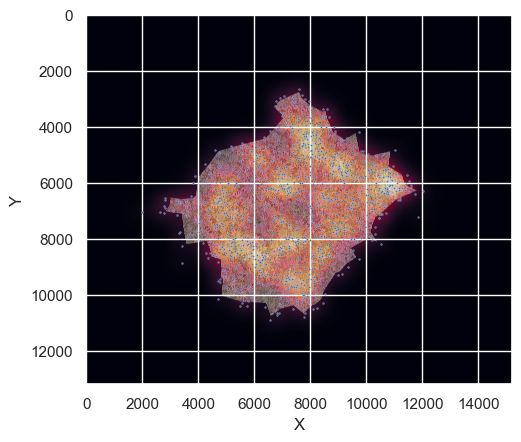

Carbon sum - all trees:  5792.727929314215
Carbon sum - filtered trees:  5792.727929314215
Carbon sum - gaussian distribution:  871.9989978588407


In [43]:
ax = plt.gca()
plt.imshow(image)
plt.imshow(carbon_distribution, alpha=0.5)
sns.scatterplot(data=trees_site, x="X", y="Y", legend=False, s=2)
plt.show()
print("Carbon sum - all trees: ", np.sum(trees_site.carbon))
print("Carbon sum - filtered trees: ", np.sum(trees_site[trees_site.carbon < carbon_threshold].carbon))
print("Carbon sum - gaussian distribution: ", np.sum(carbon_distribution))

In [44]:
print("Carbon sum - patches: ", patches_site.groupby(by="rotation").sum(numeric_only=True).carbon)

Carbon sum - patches:  rotation
0     721.293104
30    733.493909
60    722.986589
Name: carbon, dtype: float64


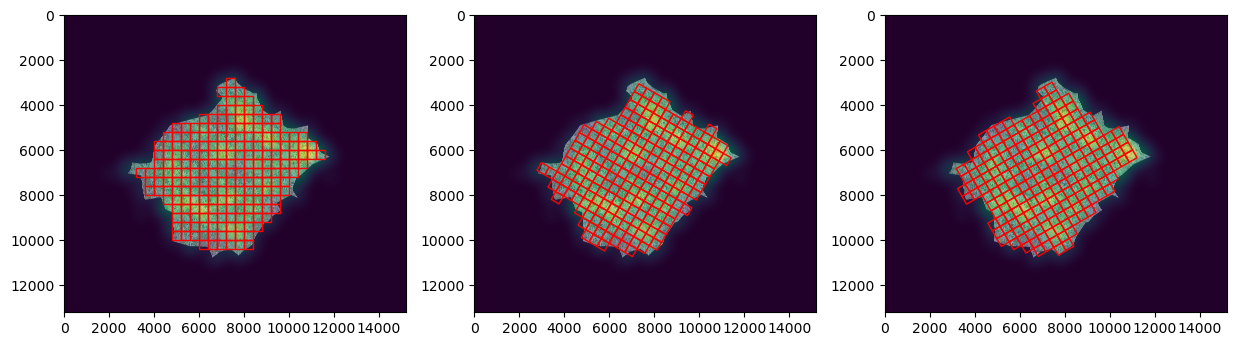

In [32]:
# works but only for transformed rectangles > 0
from scipy.ndimage import rotate
import imutils
import cv2

fig, axs = plt.subplots(1, 3, figsize=(15,5))
axs = axs.flat
for idx, angle_deg in enumerate(patches_site.rotation.unique()):
    axs[idx].imshow(image)
    axs[idx].imshow(carbon_distribution, alpha=0.5)
    for idx_patch, patch in patches_site[patches_site.rotation == angle_deg].iterrows():
        vertices = np.array(patch.vertices_transformed)
        patch_rec = plt.Rectangle(vertices[0], np.linalg.norm(vertices[1] - vertices[0]), np.linalg.norm(vertices[3] - vertices[0]), angle=patch.rotation, linewidth=1, edgecolor='r', facecolor='none')
        axs[idx].add_patch(patch_rec)
plt.show()

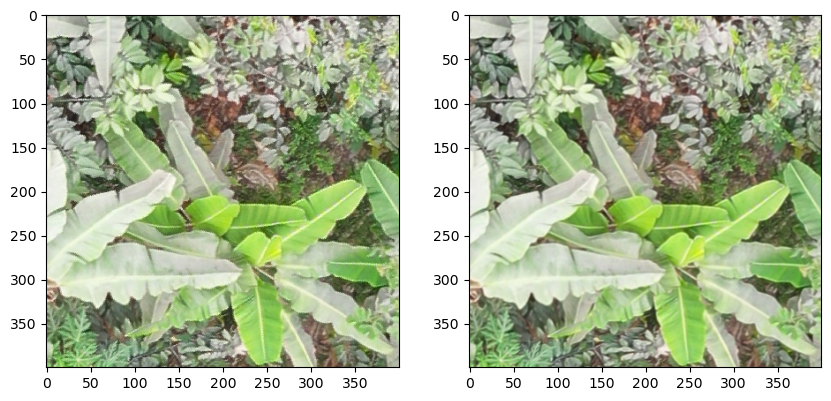

In [16]:
# comparing patches
patch = patches_site[patches_site.rotation == 60].iloc[20]
image_patch = cv2.imread('../data/dataset/{}'.format(patch.path))
image_patch = np.array(cv2.cvtColor(image_patch, cv2.COLOR_BGR2RGB))

rotated_image = imutils.rotate(image, patch.rotation)

fig, axs = plt.subplots(1, 2, figsize=(10,15))
axs = axs.flat

axs[0].imshow(image_patch)
axs[1].imshow(rotated_image[patch.vertices[0][1]:patch.vertices[2][1], patch.vertices[0][0]:patch.vertices[2][0]])
plt.show()

# Analysis of predictions

In [33]:
from sklearn.metrics import mean_squared_error
print("{:25s} | {:10s} | {:10s} | {:10s} | {:10s} | {:10s} | {:10s} | {:10s}".format("Site", "all trees", "filtered", "gaussian", "patches", "prediction", "c02/patch", "rmse"))
for site in patches.site.unique():
    trees_site = trees[trees.site == site]
    patches_site = patches[patches.site == site]
    carbon_distribution = np.load('../data/dataset/sites/{}_carbon.npy'.format(site))
    patch_carbon = np.mean(patches_site.carbon)
    rmse = mean_squared_error(patches_site.carbon, patches_site.predictions, squared=False)
    print("{:25s} | {:10.1f} | {:10.1f} | {:10.1f} | {:10.1f} | {:10.1f} | {:10.2f} | {:10.2f}".format(
        site, 
        np.sum(trees_site.carbon), 
        np.sum(trees_site[trees_site.carbon < carbon_threshold].carbon), 
        np.sum(carbon_distribution), 
        patches_site.groupby(by="rotation").sum(numeric_only=True).carbon[0],  
        patches_site.groupby(by="rotation").sum(numeric_only=True).predictions[0],
        patch_carbon,
        rmse
        ))

Site                      | all trees  | filtered   | gaussian   | patches    | prediction | c02/patch  | rmse      
Nestor Macias RGB         |     5792.7 |     5792.7 |      872.0 |      721.3 |      525.0 |       3.37 |       1.32
Leonor Aspiazu RGB        |     3198.4 |     3198.4 |      789.0 |      665.4 |        0.0 |       2.45 |       2.60
Carlos Vera Arteaga RGB   |     3034.6 |     3034.6 |      743.0 |      604.7 |      645.9 |       2.18 |       0.82
Carlos Vera Guevara RGB   |     5830.6 |     5830.6 |      929.0 |      776.2 |      454.8 |       4.37 |       2.15
Flora Pluas RGB           |     4763.5 |     4763.5 |      846.0 |      677.2 |      950.8 |       2.48 |       1.35
Manuel Macias RGB         |     1097.4 |     1097.4 |      484.0 |      357.8 |      469.3 |       2.16 |       1.11


In [45]:
from sklearn.metrics import mean_squared_error
print("{:25s} | {:10s} | {:10s} | {:10s} | {:10s} | {:10s} | {:10s} | {:10s}".format("Site", "all trees", "filtered", "gaussian", "patches", "prediction", "trees/patch", "rmse"))
for site in patches.site.unique():
    trees_site = trees[trees.site == site]
    patches_site = patches[patches.site == site]
    carbon_distribution = np.load('../data/dataset/sites/{}_carbon.npy'.format(site))
    patch_carbon = np.mean(patches_site.carbon)
    rmse = mean_squared_error(patches_site.carbon, patches_site.predictions, squared=False)
    print("{:25s} | {:10.1f} | {:10.1f} | {:10.1f} | {:10.1f} | {:10.1f} | {:10.2f} | {:10.2f}".format(
        site, 
        np.count_nonzero(trees_site.carbon), 
        np.count_nonzero(trees_site[trees_site.carbon < 10000].carbon), 
        np.sum(carbon_distribution), 
        patches_site.groupby(by="rotation").sum(numeric_only=True).carbon[0],  
        patches_site.groupby(by="rotation").sum(numeric_only=True).predictions[0],
        patch_carbon,
        rmse
        ))

Site                      | all trees  | filtered   | gaussian   | patches    | prediction | trees/patch | rmse      
Nestor Macias RGB         |      872.0 |      872.0 |      872.0 |      721.3 |      525.0 |       3.37 |       1.32
Leonor Aspiazu RGB        |      789.0 |      789.0 |      789.0 |      665.4 |        0.0 |       2.45 |       2.60
Carlos Vera Arteaga RGB   |      743.0 |      743.0 |      743.0 |      604.7 |      645.9 |       2.18 |       0.82
Carlos Vera Guevara RGB   |      929.0 |      929.0 |      929.0 |      776.2 |      454.8 |       4.37 |       2.15
Flora Pluas RGB           |      846.0 |      846.0 |      846.0 |      677.2 |      950.8 |       2.48 |       1.35
Manuel Macias RGB         |      484.0 |      484.0 |      484.0 |      357.8 |      469.3 |       2.16 |       1.11


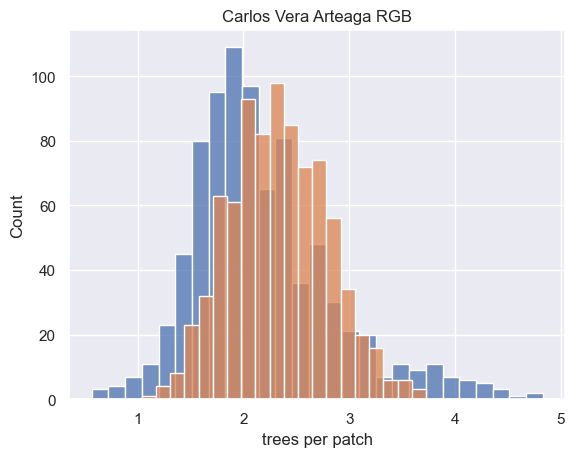

blue: true | orange: predictions


In [50]:
site = "Carlos Vera Arteaga RGB" # "Leonor Aspiazu RGB"
patches_site = patches[patches.site == site]
sns.histplot(data=patches_site, x="carbon")
sns.histplot(data=patches_site, x="predictions")
plt.title(site)
plt.xlabel('trees per patch')
plt.show()
print("blue: true | orange: predictions")

In [47]:
image = cv2.imread('../data/dataset/sites/{}_image.png'.format(site))
image = np.array(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

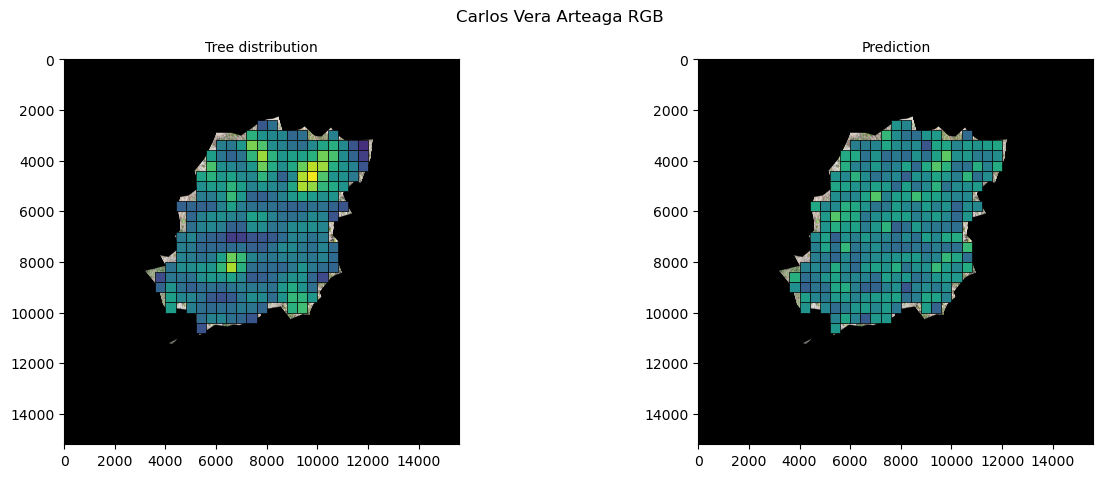

In [48]:
import matplotlib
fig, axs = plt.subplots(1, 2, figsize=(15,5))
fig.suptitle(site)
cmap = matplotlib.cm.get_cmap('viridis')
max_carbon = max(np.max(patches_site.carbon), np.max(patches_site.predictions))
angle_deg = 0
axs = axs.flat
axs[0].imshow(image)
for idx_patch, patch in patches_site[patches_site.rotation == angle_deg].iterrows():
    vertices = np.array(patch.vertices_transformed)
    patch_rec = plt.Rectangle(vertices[0], np.linalg.norm(vertices[1] - vertices[0]), np.linalg.norm(vertices[3] - vertices[0]), angle=patch.rotation, linewidth=0.5, edgecolor='k', facecolor=cmap(patch.carbon/max_carbon), alpha=1)
    axs[0].add_patch(patch_rec)
    axs[0].set_title('Tree distribution', fontsize=10)
axs[1].imshow(image)
for idx_patch, patch in patches_site[patches_site.rotation == angle_deg].iterrows():
    vertices = np.array(patch.vertices_transformed)
    patch_rec = plt.Rectangle(vertices[0], np.linalg.norm(vertices[1] - vertices[0]), np.linalg.norm(vertices[3] - vertices[0]), angle=patch.rotation, linewidth=0.5, edgecolor='k', facecolor=cmap(patch.predictions/max_carbon), alpha=1)
    axs[1].add_patch(patch_rec)
    axs[1].set_title('Prediction', fontsize=10)
plt.show()

# Analysis of benchmark prediction

In [28]:
benchmark = pd.DataFrame(columns=['site', 'true_value', 'preds'])
for site in patches.site.unique():
    predictions = pd.read_csv('../results/benchmark/{}.csv'.format(site), index_col=0)
    predictions['site'] = site
    benchmark = pd.concat([benchmark, predictions])
benchmark = benchmark.rename(columns={'true_value': 'carbon', 'preds': 'predictions'})
benchmark


,site,carbon,predictions
0,Nestor Macias RGB,2.768376,3.518025
1,Nestor Macias RGB,3.234511,2.348795
2,Nestor Macias RGB,1.641436,2.128961
3,Nestor Macias RGB,7.426085,3.529415
4,Nestor Macias RGB,3.234511,2.372533
...,...,...,...
117,Manuel Macias RGB,1.674387,4.513168
118,Manuel Macias RGB,5.202679,3.149036
119,Manuel Macias RGB,5.825807,3.908022
120,Manuel Macias RGB,1.054746,3.952862


In [29]:
from sklearn.metrics import mean_squared_error
print("{:25s} | {:10s} | {:10s} | {:10s} | {:10s} | {:10s}".format("Site", "all trees", "matched trees", "prediction", "c02/tree", "rmse"))
for site in patches.site.unique():
    trees_site = trees[trees.site == site]
    benchmark_site = benchmark[benchmark.site == site]
    print("{:25s} | {:10.1f} | {:10.1f} | {:10.1f} | {:10.2f} | {:10.2f}".format(
        site, 
        np.sum(trees_site.carbon), 
        np.sum(benchmark_site.carbon), 
        np.sum(benchmark_site.predictions),
        np.mean(benchmark_site.carbon),
        mean_squared_error(benchmark_site.carbon, benchmark_site.predictions, squared=False)
        ))

Site                      | all trees  | matched trees | prediction | c02/tree   | rmse      
Nestor Macias RGB         |     5792.7 |      771.7 |      735.4 |       3.62 |       1.54
Leonor Aspiazu RGB        |     3198.4 |      775.8 |      755.5 |       3.51 |       1.46
Carlos Vera Arteaga RGB   |     3034.6 |      826.1 |      832.7 |       3.52 |       1.45
Carlos Vera Guevara RGB   |     5830.6 |      798.6 |        0.0 |       3.60 |       3.97
Flora Pluas RGB           |     4763.5 |      904.8 |      751.2 |       3.62 |       1.65
Manuel Macias RGB         |     1097.4 |      395.4 |      441.2 |       3.24 |       1.41


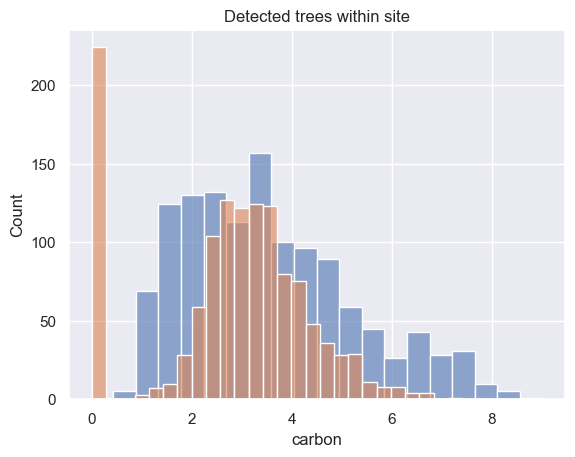

blue: true | orange: predictions


In [30]:
sns.set_theme()
site = "Detected trees within site" # "Leonor Aspiazu RGB"
benchmark_site = benchmark[benchmark.site == site]
sns.histplot(data=benchmark, x="carbon", alpha=0.6)
sns.histplot(data=benchmark, x="predictions", alpha=0.6)
plt.title(site)
plt.show()
print("blue: true | orange: predictions")